### <b>Assignment 1 - Part 1 - C263H </b>
##### <b>Student</b>: Erin Jones
##### <b>Deadline</b>: 9/7/2023 (48 hr grace period)
##### <b>Last Edit Made</b>: 9/9/2023

The code below produces answers to questions 1, 2, 3 & 4 of assignment 1 (part 1) in C263H. For ease of grading Q1-3, the answers are listed here, but are also printed out below the cell containing the calculations.

##### <b>Question 1</b>
> * The random graph has 58 nodes and 293 links
> * The acquaintances graph has 53 nodes and 122 links
##### <b>Question 2</b>
> * Average degree of the random graph is = 10.10344827586207
> * Average degree of the acquaintances graph is = 4.60377358490566
##### <b>Question 3</b>
> * The maximum degree of the random graph is 15. The student node ID(s) associated with the maximum degree is/are: [11]
> * The maximum degree of the acquaintances graph is 10. The student node ID(s) associated with the maximum degree is/are: [46, 24]
##### <b>Question 4</b>
> * See graph with both degree histograms below



In [1]:
# IMPORTS
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# READ IN DATA
# Note - Data must be in same dir as notebook!
nodez = pd.read_csv("nodes_c263h.csv")
rand_nodez = pd.read_csv("c263h_links_random.csv")
acq_nodez = pd.read_csv("ce263h_links_acquaintances.csv")

In [2]:
# Create and analyze undirected graph from the random links csv

g_rand = nx.Graph()

# Make graph from dataframe
for index, row in rand_nodez.iterrows():
    source_node = row['source']
    target_node = row['target']
    if source_node != target_node:
        g_rand.add_edge(source_node, target_node)

# number of nodes, number of edges/links, average degree of graph
rand_node_count = g_rand.number_of_nodes()
rand_link_count = g_rand.number_of_edges()
rand_avg_degree = np.mean(list(dict(g_rand.degree()).values()))

# pull node(s) with maximum degree
max_degree = max(g_rand.degree, key=lambda x: x[1])[1]
nodes_with_max_degree = [node for node in g_rand.nodes if g_rand.degree[node] == max_degree]

# print results
print(f"The random graph has {rand_node_count} nodes and {rand_link_count} links")
print (f"Average degree of the random graph is = {rand_avg_degree}")
print(f"The maximum degree of the random graph is {max_degree}. The student node ID(s) associated with the maximum degree is/are: {nodes_with_max_degree}")


The random graph has 58 nodes and 293 links
Average degree of the random graph is = 10.10344827586207
The maximum degree of the random graph is 15. The student node ID(s) associated with the maximum degree is/are: [11]


In [3]:
# Create and analyze an undirected graph from the acquaintances links csv
g_acq = nx.Graph()

# Make graph from dataframe
for index, row in acq_nodez.iterrows():
    source_node = row['source ']
    target_node = row['target']
    if source_node != target_node:
        g_acq.add_edge(source_node, target_node)

# number of nodes, number of edges/links, average degree of graph
acq_node_count = g_acq.number_of_nodes()
acq_link_count = g_acq.number_of_edges()
acq_avg_degree = np.mean(list(dict(g_acq.degree()).values()))

# pull node(s) with maximum degree
max_degree = max(g_acq.degree, key=lambda x: x[1])[1]
nodes_with_max_degree = [node for node in g_acq.nodes if g_acq.degree[node] == max_degree]

# print results
print(f"The acquaintances graph has {acq_node_count} nodes and {acq_link_count} links")
print (f"Average degree of the acquaintances graph is = {acq_avg_degree}")
print(f"The maximum degree of the acquaintances graph is {max_degree}. The student node ID(s) associated with the maximum degree is/are: {nodes_with_max_degree}")

The acquaintances graph has 53 nodes and 122 links
Average degree of the acquaintances graph is = 4.60377358490566
The maximum degree of the acquaintances graph is 10. The student node ID(s) associated with the maximum degree is/are: [46, 24]


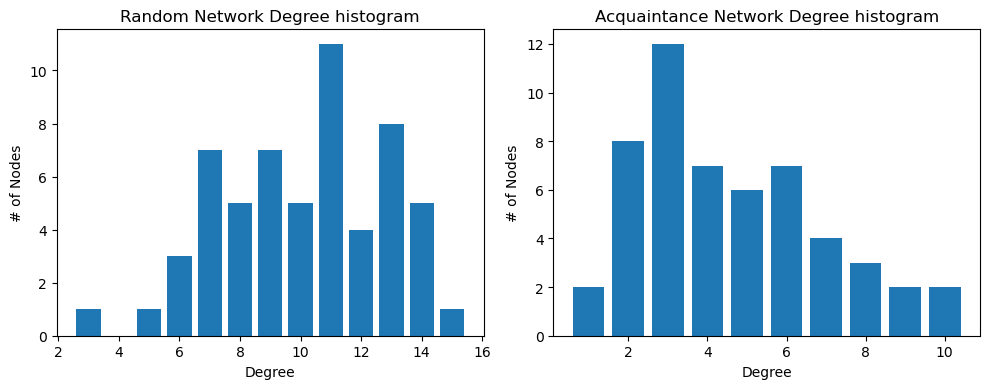

In [4]:
# Create Plot!

degree_sequence_rand = sorted((d for n, d in g_rand.degree()), reverse=True)
degree_sequence_acq = sorted((d for n, d in g_acq.degree()), reverse=True)

# max value from the listed degrees in the sequence
dmax_rand = max(degree_sequence_rand)
dmax_acq = max(degree_sequence_acq)

# instatiate a matplotlib figure
fig = plt.figure("Degree Histograms", figsize=(10, 4))

# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(3, 4)

# random network degree histogram
ax1 = fig.add_subplot(axgrid[:, :2])
ax1.bar(*np.unique(degree_sequence_rand, return_counts=True))
ax1.set_title("Random Network Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

# acquaintances network degree histogram
ax2 = fig.add_subplot(axgrid[:, 2:])
ax2.bar(*np.unique(degree_sequence_acq, return_counts=True))
ax2.set_title("Acquaintance Network Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()